# Factor investing analysis

Market factors, such as momentum and value, ...

## Further reading

Here are some great resources on further reading around factor investing:
    
    1. Investopedia - Factor Investing - https://www.investopedia.com/terms/f/factor-investing.asp
    2. https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/fidelity/fidelity-overview-of-factor-investing.pdf
    

In [1]:
import pandas as pd, numpy as np
from fidap import fidap_client

In [2]:
fidap = fidap_client(api_key="1287a2d9e40042edb53254cd203b9a0b")

In [5]:
fidap.sql("""select * from meta_tables limit 5""")

,table_catalog,table_schema,table_name,row_count,bytes,column_count,datapoints,description
0,FIDAP_DATA_SOURCES,FIDAP_SCHEMA,ACTIONS,139329,1440256,7,975303,This table contains earnings fundamentals.
1,FIDAP_DATA_SOURCES,FIDAP_SCHEMA,CENSUSDATA,298080,10221056,17,5067360,N.A update if required
2,FIDAP_DATA_SOURCES,FIDAP_SCHEMA,CORR,43110,472576,3,129330,Calculated correlations - top 100 for each stock.
3,FIDAP_DATA_SOURCES,FIDAP_SCHEMA,DAILY,18042804,2329842688,40,721712160,Historical daily prices.
4,FIDAP_DATA_SOURCES,FIDAP_SCHEMA,DATES,1278,17920,3,3834,Calendar for the US equity market.


Let's do a query that splits tickers into deciles based on their market cap. We can use the built in SQL function NTILE ([Snowflake docs](https://docs.snowflake.com/en/sql-reference/functions/ntile.html)). After we split the companies into deciles (called `group_no`), we then group them, take the average return at the decile level, and order by the `group_no

In [9]:
df = fidap.sql("""
SELECT AVG(pc_1d)*100 as return,
       group_no
FROM
  (SELECT ticker, date, pc_1d,
                        marketcap,
                        NTILE(10) OVER(
                                       ORDER BY marketcap DESC) AS group_no
   FROM tickers
   WHERE marketcap > 100000000) AS tmp
GROUP BY group_no
ORDER BY group_no;
""")

In [10]:
import seaborn as sns

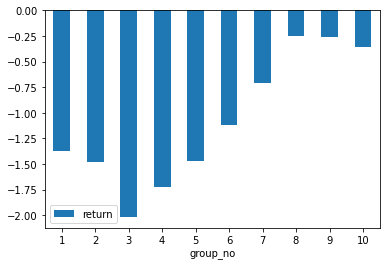

In [11]:
ax = df.plot.bar(x='group_no', y='return', rot=0)